In [1]:
# Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import os
import matplotlib.pyplot as plt
import joblib


In [2]:
# Define the correct datatypes for pandas
dtype_dict = {
    'HCP_ID': 'str',
    'PATIENT_AGE': 'Int64',
    'PATIENT_GENDER': 'category',
    'PATIENT_ID': 'str',
    'STATE': 'category',
    'HCP_SPECIALTY': 'category',
    'HCP_AGE': 'Int64',
    'HCP_GENDER': 'category',
    'STATE_NAME': 'category',
    'TXN_LOCATION_TYPE': 'category',
    'INSURANCE_TYPE': 'category',
    'TXN_TYPE': 'category',
    'TXN_DESC': 'category',
    'LOWCONT_COUNT': 'Int64',
    'MEDCONT_COUNT': 'Int64',
    'HIGHCONT_COUNT': 'Int64',
    'NUM_CONDITIONS': 'Int64',
    'NUM_CONTRAINDICATIONS': 'Int64',
    'NUM_SYMPTOMS': 'Int64',
    'DRUGA_COUNT': 'Int64',
    'TARGET': 'Int64'
}

# Define the path to the CSV file
file_path = '../../data/model_input/ads_model_table.csv'

# Check if the file exists
if not os.path.exists(file_path):
    raise FileNotFoundError(f"The file {file_path} does not exist.")

# Load the CSV file without specifying dtype initially
ads_model_df = pd.read_csv(file_path)

# Convert columns to the specified data types
for col, dtype in dtype_dict.items():
    if col in ads_model_df.columns:
        if dtype == 'category':
            ads_model_df[col] = ads_model_df[col].astype('category')
        elif dtype == 'Int64':
            ads_model_df[col] = pd.to_numeric(ads_model_df[col], errors='coerce').astype('Int64')
        else:
            ads_model_df[col] = ads_model_df[col].astype(dtype)

# Parse dates to datetime
date_columns = ['TXN_DT']
for col in date_columns:
    if col in ads_model_df.columns:
        ads_model_df[col] = pd.to_datetime(ads_model_df[col], errors='coerce')

# Display the DataFrame info
ads_model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3407 entries, 0 to 3406
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   PATIENT_ID             3407 non-null   object        
 1   PATIENT_GENDER         3407 non-null   category      
 2   NUM_CONDITIONS         3407 non-null   Int64         
 3   NUM_CONTRAINDICATIONS  3407 non-null   Int64         
 4   TXN_DT                 3407 non-null   datetime64[ns]
 5   HCP_ID                 3407 non-null   object        
 6   TXN_LOCATION_TYPE      3407 non-null   category      
 7   INSURANCE_TYPE         3407 non-null   category      
 8   PATIENT_AGE_DIAGNOSED  3407 non-null   int64         
 9   STATE                  3407 non-null   category      
 10  HCP_SPECIALTY          3407 non-null   category      
 11  HCP_GENDER             3407 non-null   category      
 12  TARGET                 3407 non-null   Int64         
dtypes: 

In [3]:
# Preprocess categorical features
categorical_columns = ads_model_df.select_dtypes(include=['category']).columns
ads_model_df = pd.get_dummies(ads_model_df, columns=categorical_columns, drop_first=True)

In [4]:
# Define features and target variable
X = ads_model_df.drop(columns=['PATIENT_ID', 'TXN_DT', 'HCP_ID', 'TARGET'])
y = ads_model_df['TARGET']

In [5]:
ads_model_df.head()

,PATIENT_ID,NUM_CONDITIONS,NUM_CONTRAINDICATIONS,TXN_DT,HCP_ID,PATIENT_AGE_DIAGNOSED,TARGET,PATIENT_GENDER_M-Male,TXN_LOCATION_TYPE_CLINIC - FREESTANDING,TXN_LOCATION_TYPE_CLINIC - RURAL HEALTH,...,HCP_SPECIALTY_SPORTS MEDICINE (EMERGENCY MEDICINE),HCP_SPECIALTY_SPORTS MEDICINE (FAMILY MEDICINE),HCP_SPECIALTY_SPORTS MEDICINE (PEDIATRICS),"HCP_SPECIALTY_STUDENT, HEALTH CARE",HCP_SPECIALTY_THORACIC SURGERY,HCP_SPECIALTY_UNSPECIFIED,HCP_SPECIALTY_UROLOGY,HCP_SPECIALTY_VASCULAR & INTERVENTIONAL RADIOLOGY,HCP_GENDER_M-Male,HCP_GENDER_U-Unknown
0,1,1,0,2022-06-11,24633,34,0,True,False,False,...,False,False,False,False,False,False,False,False,True,False
1,2,1,0,2022-06-22,7777,2,0,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,3,1,0,2022-06-20,17051,49,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,1,0,2022-06-30,19478,0,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,7,1,0,2022-06-06,8189,1,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Initialize and train the random forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
# Make predictions and evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89       561
         1.0       0.26      0.06      0.09       121

    accuracy                           0.80       682
   macro avg       0.54      0.51      0.49       682
weighted avg       0.73      0.80      0.75       682



In [9]:
# Feature importance
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))

                                         Feature  Importance
2                          PATIENT_AGE_DIAGNOSED    0.182269
0                                 NUM_CONDITIONS    0.153909
1                          NUM_CONTRAINDICATIONS    0.069945
3                          PATIENT_GENDER_M-Male    0.032699
160                            HCP_GENDER_M-Male    0.028834
..                                           ...         ...
150            HCP_SPECIALTY_SELECTIVE PATHOLOGY    0.000000
128                 HCP_SPECIALTY_OTOLARYNGOLOGY    0.000000
91   HCP_SPECIALTY_CHILD & ADOLESCENT PSYCHIATRY    0.000000
142                     HCP_SPECIALTY_PODIATRIST    0.000000
140               HCP_SPECIALTY_PHYSICAL THERAPY    0.000000

[162 rows x 2 columns]


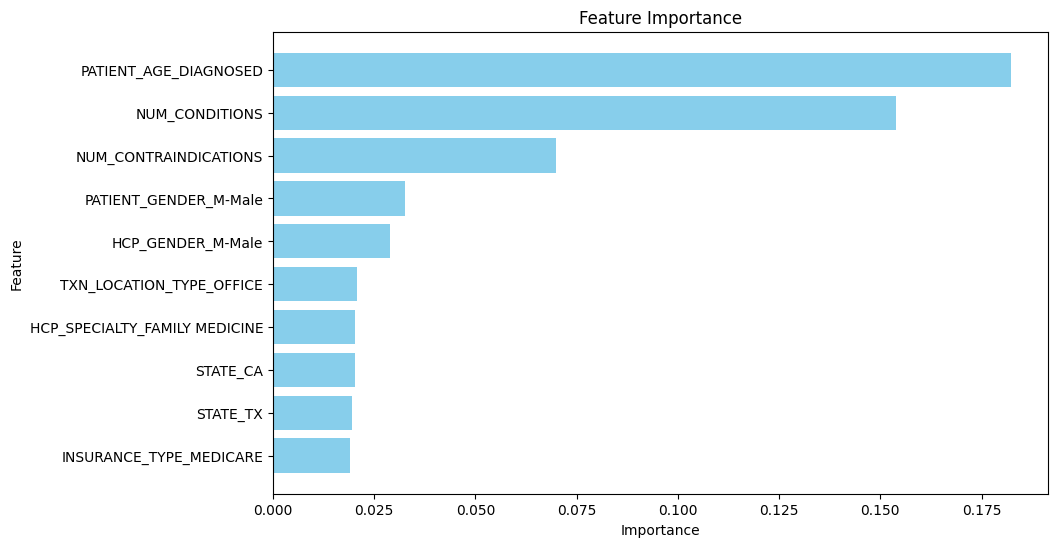

In [10]:
# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select top 10 features
top_10_features = feature_importance_df.head(10)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [11]:
# Define the path to save the model
model_save_path = '../../models/saved_models/random_forest_model.joblib'

# Save the model
joblib.dump(model, model_save_path)
print(f"Model saved to {model_save_path}")

Model saved to ../../models/saved_models/random_forest_model.joblib


In [12]:
# Get the list of columns from the training DataFrame
#training_columns = X_train.columns.tolist()
#training_columns

In [13]:
X.head()

,NUM_CONDITIONS,NUM_CONTRAINDICATIONS,PATIENT_AGE_DIAGNOSED,PATIENT_GENDER_M-Male,TXN_LOCATION_TYPE_CLINIC - FREESTANDING,TXN_LOCATION_TYPE_CLINIC - RURAL HEALTH,TXN_LOCATION_TYPE_COMPREHENSIVE OUTPATIENT REHABILITATION FACILITY,TXN_LOCATION_TYPE_CRITICAL ACCESS HOSPITAL,TXN_LOCATION_TYPE_EMERGENCY ROOM - HOSPITAL,TXN_LOCATION_TYPE_FEDERALLY QUALIFIED HEALTH CENTER,...,HCP_SPECIALTY_SPORTS MEDICINE (EMERGENCY MEDICINE),HCP_SPECIALTY_SPORTS MEDICINE (FAMILY MEDICINE),HCP_SPECIALTY_SPORTS MEDICINE (PEDIATRICS),"HCP_SPECIALTY_STUDENT, HEALTH CARE",HCP_SPECIALTY_THORACIC SURGERY,HCP_SPECIALTY_UNSPECIFIED,HCP_SPECIALTY_UROLOGY,HCP_SPECIALTY_VASCULAR & INTERVENTIONAL RADIOLOGY,HCP_GENDER_M-Male,HCP_GENDER_U-Unknown
0,1,0,34,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
1,1,0,2,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,1,0,49,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,0,0,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,1,0,1,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
